<a href="https://colab.research.google.com/github/kalyan114/Auto-Encoder_ML/blob/main/Auto_Encoding_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Simple Autoencoder
We begin by importing all the necessary libraries :

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Then we will build our model and we will provide the number of dimensions that will decide how much the input will be compressed. The lesser the dimension, the more will be the compression.

In [ ]:
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

Then we need to build the encoder model and decoder model separately so that we can easily differentiate between the input and output.

In [ ]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Then we need to compile the model with the ADAM optimizer and cross-entropy loss function fitment.

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Then you need to load the data :

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


If you want to see how the data is actually, you can use the following line of code :

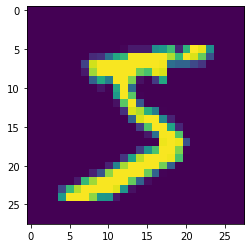

In [ ]:
plt.imshow(x_train[0].reshape(28,28))

Then you need to train your model :

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 3s 9ms/step - loss: 0.3120 - val_loss: 0.2300
Epoch 2/15
235/235 [==============================] - 3s 12ms/step - loss: 0.2066 - val_loss: 0.1868
Epoch 3/15
235/235 [==============================] - 2s 9ms/step - loss: 0.1764 - val_loss: 0.1641
Epoch 4/15
235/235 [==============================] - 2s 9ms/step - loss: 0.1592 - val_loss: 0.1532
Epoch 5/15
235/235 [==============================] - 2s 9ms/step - loss: 0.1515 - val_loss: 0.1477
Epoch 6/15
235/235 [==============================] - 2s 9ms/step - loss: 0.1473 - val_loss: 0.1443
Epoch 7/15
235/235 [==============================] - 2s 9ms/step - loss: 0.1443 - val_loss: 0.1416
Epoch 8/15
235/235 [==============================] - 2s 9ms/step - loss: 0.1418 - val_loss: 0.1393
Epoch 9/15
235/235 [==============================] - 3s 13ms/step - loss: 0.1397 - val_loss: 0.1374
Epoch 10/15
235/235 [==============================] - 2s 10ms/step - loss: 0.1380 - val_loss: 0.1

After training, you need to provide the input and you can plot the results using the following code :

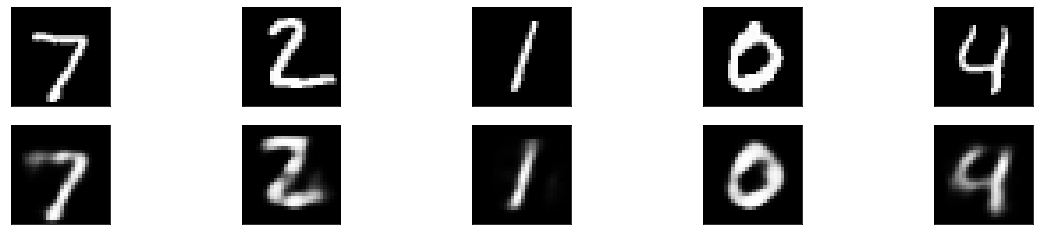

In [ ]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

You can clearly see the output for the encoded and decoded images respectively as shown below.

2. Deep CNN Autoencoder :

Since the input here is images, it does make more sense to use a Convolutional Neural network or CNN. The encoder will be made up of a stack of Conv2D and max-pooling layer and the decoder will have a stack of Conv2D and Upsampling Layer.

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()
# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)       0

Now you need to load the data and training the model

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
model.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 136s 290ms/step - loss: 0.1292 - val_loss: 0.0805
Epoch 2/15
469/469 [==============================] - 127s 270ms/step - loss: 0.0783 - val_loss: 0.0752
Epoch 3/15
469/469 [==============================] - 123s 263ms/step - loss: 0.0748 - val_loss: 0.0733
Epoch 4/15
469/469 [==============================] - 123s 263ms/step - loss: 0.0730 - val_loss: 0.0717
Epoch 5/15
469/469 [==============================] - 122s 260ms/step - loss: 0.0719 - val_loss: 0.0708
Epoch 6/15
469/469 [==============================] - 124s 263ms/step - loss: 0.0710 - val_loss: 0.0700
Epoch 7/15
469/469 [==============================] - 122s 260ms/step - loss: 0.0704 - val_loss: 0.0695
Epoch 8/15
469/469 [==============================] - 127s 270ms/step - loss: 0.0698 - val_loss: 0.0692
Epoch 9/15
469/469 [==============================] - 122s 261ms/step - loss: 0.0694 - val_loss: 0.0686
Epoch 10/15
469/469 [==============================] - 123s 263m

Now you need to provide the input and plot the output for the following results

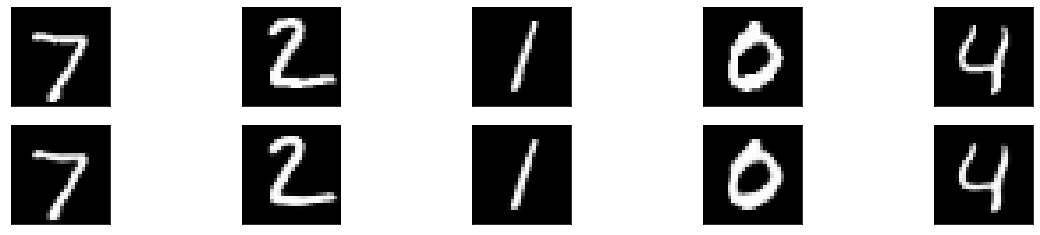

In [ ]:
pred = model.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

3. Denoising Autoencoder
Now we will see how the model performs with noise in the image. What we mean by noise is blurry images, changing the color of the images, or even white markers on the image.

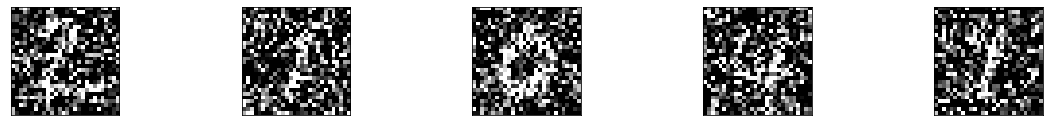

In [ ]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
# Here is how the noisy images look right now.
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Now the images are barely identifiable and to increase the extent of the autoencoder, we will modify the layers of the defined model to increase the filter so that the model performs better and then fit the model.

In [ ]:
model = Sequential()
# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 156s 332ms/step - loss: 0.1941 - val_loss: 0.1490
Epoch 2/15
469/469 [==============================] - 155s 330ms/step - loss: 0.1446 - val_loss: 0.1390
Epoch 3/15
469/469 [==============================] - 156s 333ms/step - loss: 0.1374 - val_loss: 0.1347
Epoch 4/15
469/469 [==============================] - 156s 333ms/step - loss: 0.1331 - val_loss: 0.1309
Epoch 5/15
469/469 [==============================] - 153s 327ms/step - loss: 0.1308 - val_loss: 0.1289
Epoch 6/15
469/469 [==============================] - 154s 329ms/step - loss: 0.1292 - val_loss: 0.1275
Epoch 7/15
469/469 [==============================] - 155s 330ms/step - loss: 0.1280 - val_loss: 0.1267
Epoch 8/15
469/469 [==============================] - 156s 333ms/step - loss: 0.1270 - val_loss: 0.1259
Epoch 9/15
469/469 [==============================] - 155s 330ms/step - loss: 0.1262 - val_loss: 0.1249
Epoch 10/15
469/469 [==============================] - 154s 327m

After the training, we will provide the input and write a plot function to see the final results.

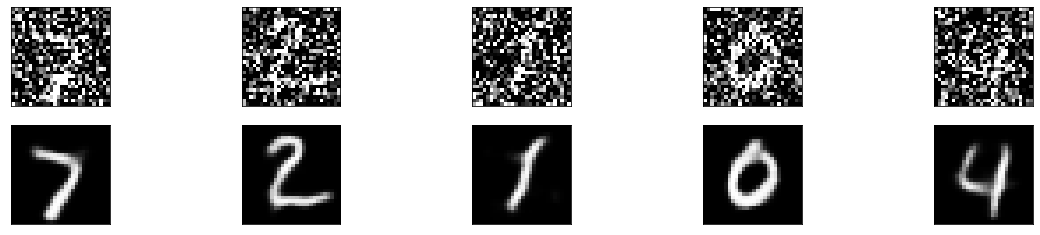

In [ ]:
pred = model.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

We have gone through the structure of how autoencoders work and worked with 3 types of autoencoders. There are multiple uses for autoencoders like dimensionality reduction image compression, recommendations system for movies and songs and more. The performance of the model can be increased by training it for more epochs or also by increasing the dimension of our network.